In [1]:
#Import
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
import scipy
from scipy.stats.stats import pearsonr
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import math

In [2]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

In [3]:
#Data frame and missing value 
df = pd.read_csv('usa_rate.csv',encoding='iso-8859-1')
df1 = pd.read_csv('dataset.csv',encoding='iso-8859-1')
df_usa = df1[df1.iso == 'USA']
df_usa_29_10 = df_usa[(df_usa.year >= 1929) & (df_usa.year <= 2014)]
#df_usa_29_10.tail()

In [4]:
#Data Merging

In [5]:
merged1 = pd.merge(df_usa_29_10, df, on='year')
merged = merged1.fillna(0)

In [6]:
merged.head()

,ccode,iso,year,govvote,oppvote,frac,partycount,right,left,extr,...,pk_norm,pk_dis,cpi,govcris,turnover,vetopl,dict,election,election_year,gdpgrowthrate
0,20,USA,1929,56.689999,42.290001,0.47260,3.0,0.0,0.0,0.0,...,0,0,12.976300,0.0,1.0,0.0,0,0.0,1928.0,0.0
1,20,USA,1930,52.720001,45.590000,0.50228,3.0,0.0,0.0,0.0,...,0,0,12.647460,2.0,0.0,0.0,0,1.0,1930.0,-8.5
2,20,USA,1931,52.720001,45.590000,0.50228,3.0,0.0,0.0,0.0,...,0,0,11.534490,0.0,0.0,0.0,0,0.0,1930.0,-6.4
3,20,USA,1932,55.709999,42.150002,0.40979,3.0,0.0,0.0,0.0,...,0,0,10.345630,0.0,0.0,0.0,0,1.0,1932.0,-12.9
4,20,USA,1933,55.709999,42.150002,0.40979,3.0,0.0,0.0,0.0,...,0,0,9.814432,0.0,1.0,0.0,0,0.0,1932.0,-1.2


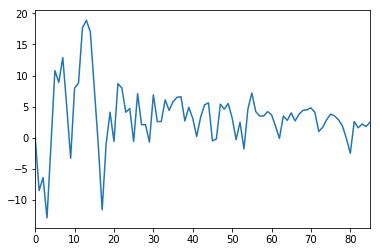

In [7]:
hist_plot = df['gdpgrowthrate'].plot()

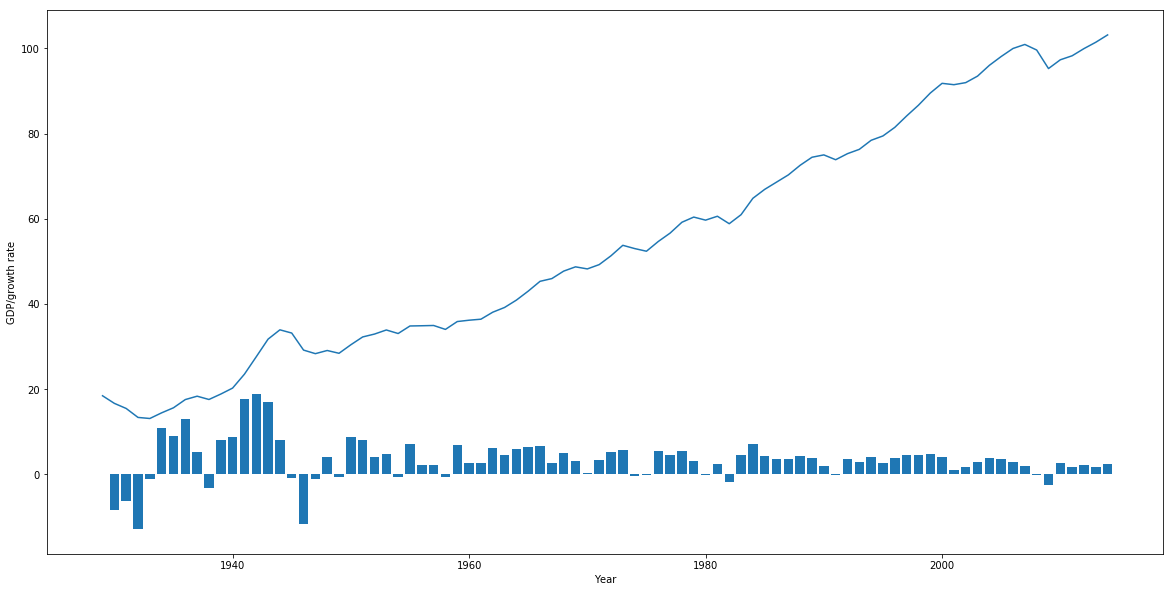

In [8]:
#Comparison of both Data sets
plt.figure(figsize=(20,10))
x = merged['year']
y= merged['gdpgrowthrate']
z=merged['rgdp']
plt.xlabel('Year')
plt.ylabel('GDP/growth rate')
plt.bar(x,y)
plt.plot(x,z)

In [9]:
#Conversion of Data
merged.loc[merged['gdpgrowthrate'] < 0, 'gdp_growth_rate'] = 0
merged.loc[merged['gdpgrowthrate'] >= 0, 'gdp_growth_rate'] = 1

In [10]:
merged[['year','rgdp','gdpgrowthrate','gdp_growth_rate']].tail(8)

,year,rgdp,gdpgrowthrate,gdp_growth_rate
78,2007,100.942612,1.9,1.0
79,2008,99.633270,-0.1,0.0
80,2009,95.279793,-2.5,0.0
81,2010,97.340813,2.6,1.0
82,2011,98.283226,1.6,1.0
83,2012,99.968275,2.2,1.0
84,2013,101.459977,1.8,1.0
85,2014,103.184820,2.5,1.0


In [11]:
merged_fill = merged.fillna(merged.median())
merged_fill.columns

Index(['ccode', 'iso', 'year', 'govvote', 'oppvote', 'frac', 'partycount',
       'right', 'left', 'extr', 'protests', 'protestsdev', 'demosdev',
       'riotsdev', 'strikesdev', 'rgdp', 'gdppeak', 'crisisJST', 'pk_fin',
       'pk_norm', 'pk_dis', 'cpi', 'govcris', 'turnover', 'vetopl', 'dict',
       'election', 'election_year', 'gdpgrowthrate', 'gdp_growth_rate'],
      dtype='object')

In [12]:
#Predictors and Target Values
feature_cols =['protests', 'protestsdev', 'demosdev',
       'riotsdev', 'strikesdev', 'crisisJST', 'pk_fin',
       'pk_norm', 'pk_dis', 'govcris', 'turnover']
y = merged_fill.gdp_growth_rate
X = merged_fill[feature_cols]

In [14]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 100)

In [15]:
#Feature Selection
clf=RandomForestClassifier(n_estimators=600)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [16]:
print("Accuracy with Random Forest :",accuracy_score(y_test, y_pred))

feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False)
print('Feature Importance')
print(feature_imp)

Accuracy: 0.7307692307692307
strikesdev     0.343641
protestsdev    0.157509
riotsdev       0.155108
demosdev       0.129878
protests       0.102497
turnover       0.058557
pk_norm        0.021224
govcris        0.016303
crisisJST      0.007577
pk_fin         0.005064
pk_dis         0.002642
dtype: float64


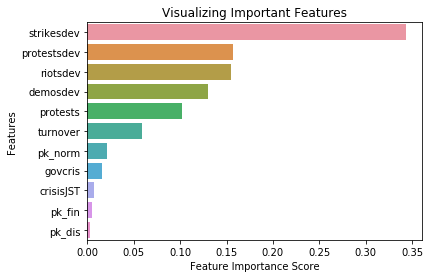

In [17]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [18]:
#Selected Features
new_X = X[['strikesdev','riotsdev','protestsdev','demosdev']]
X_train, X_test, y_train, y_test = train_test_split( new_X, y, test_size = 0.3, random_state = 100)

In [19]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score,auc,roc_curve,roc_auc_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [20]:

m = []
m.append(('Logistic Regression', LogisticRegression()))
m.append(('KNN', KNeighborsClassifier()))
m.append(('Decision Tree', DecisionTreeClassifier(criterion="entropy")))
m.append(('Naive Bayes', GaussianNB()))
m.append(('Random Forest', RandomForestClassifier()))
m.append(('Support Vector Machine', SVC(probability=True)))
m.append(('Neural Network', MLPClassifier()))


names = []
results = []
train = []

for name, model in m:
    fittedModel = model.fit(X_train,y_train)
    predictions = fittedModel.predict(X_test)
    results.append(accuracy_score(y_test,predictions))
    
    names.append(name)
    msg = "%s: %f " % (name, accuracy_score(y_test,predictions).mean())
    print(msg)
    print('Training score: {:.2f}'.format(fittedModel.score(X_train, y_train)))
    print('Test score: {:.2f}'.format(fittedModel.score(X_test, y_test)))
    train.append(fittedModel.score(X_train, y_train))
    mse = mean_squared_error(y_test, predictions)
    rmse = math.sqrt(mse)

    print('RMSE: {:.2f}'.format(rmse))
    print('---')
    

C:\Users\Aneeba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aneeba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aneeba\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Logistic Regression: 0.807692 
Training score: 0.82
Test score: 0.81
RMSE: 0.44
---
KNN: 0.730769 
Training score: 0.87
Test score: 0.73
RMSE: 0.52
---
Decision Tree: 0.769231 
Training score: 0.98
Test score: 0.77
RMSE: 0.48
---
Naive Bayes: 0.653846 
Training score: 0.82
Test score: 0.65
RMSE: 0.59
---
Random Forest: 0.692308 
Training score: 0.95
Test score: 0.69
RMSE: 0.55
---
Support Vector Machine: 0.807692 
Training score: 0.78
Test score: 0.81
RMSE: 0.44
---
Neural Network: 0.769231 
Training score: 0.87
Test score: 0.77
RMSE: 0.48
---


C:\Users\Aneeba\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5, 1.0, 'Train and Test Accuracy')

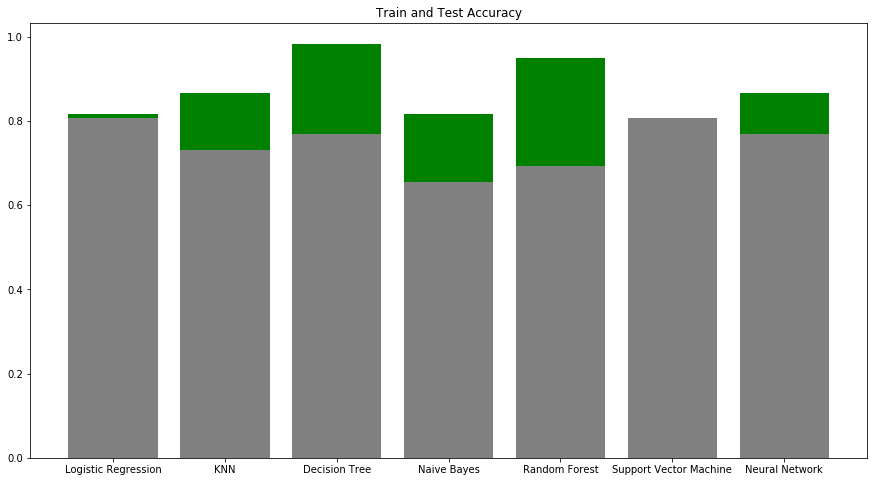

In [21]:
#Bar Plots
plt.figure(figsize=(15,8))
plt.bar(names,train, color='g')
plt.bar(names,results, color='grey')
plt.title('Train and Test Accuracy')

In [22]:
m=merged_fill.tail(10)
m[['year','strikesdev','riotsdev','protestsdev','demosdev','gdp_growth_rate']]

,year,strikesdev,riotsdev,protestsdev,demosdev,gdp_growth_rate
76,2005,-0.014437,-0.097584,1.099496,1.111314,1.0
77,2006,-0.007675,-0.102217,1.102877,1.114835,1.0
78,2007,0.013937,-0.056037,1.157816,1.165070,1.0
79,2008,0.058772,0.089692,1.295465,1.288008,0.0
80,2009,0.132978,0.392670,1.583530,1.545033,0.0
81,2010,0.233293,0.896245,2.104251,2.013256,1.0
82,2011,0.335185,1.580941,2.862283,2.698360,1.0
83,2012,0.376790,2.283879,3.636501,3.394812,1.0
84,2013,0.000000,0.000000,0.000000,0.000000,1.0
85,2014,0.000000,0.000000,0.000000,0.000000,1.0


In [23]:
#lr = LogisticRegression(solver='lbfgs')
nn=SVC(probability=True)
log = nn.fit(X_train,y_train)
#log.predict([[0.013937,-0.056037,1.157816,1.165070]])
#log.predict([[0.058772,0.089692,1.295465,1.288008]])
log.predict([[0.058772,0.089692,1.295465,1.288008]])

C:\Users\Aneeba\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([1.])